# LINRARY DAN DRIVE

In [ ]:
#!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)
from scipy.signal import firwin, lfilter


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


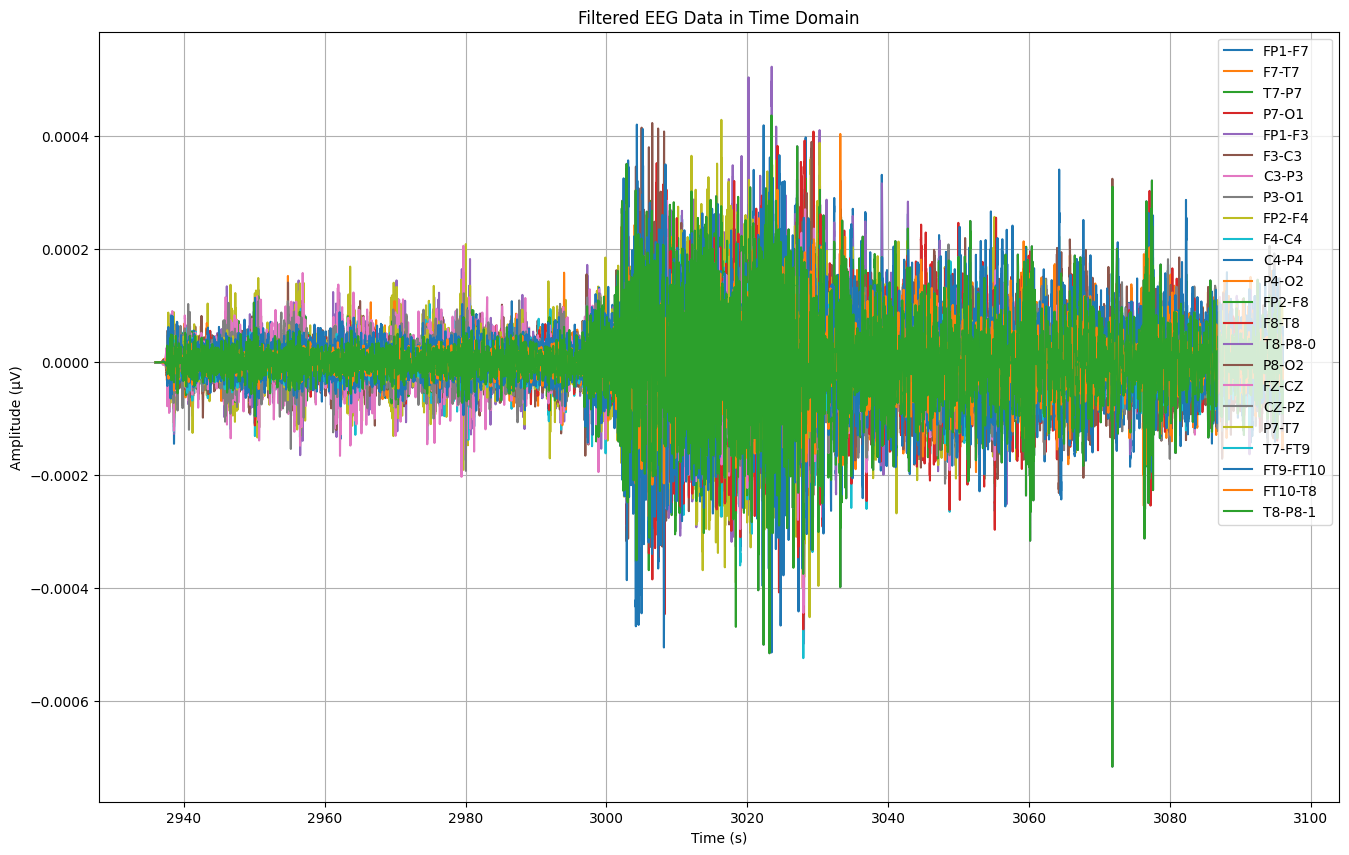

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hann')  # ganti dari 'hamming' ke 'hann'
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 846

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



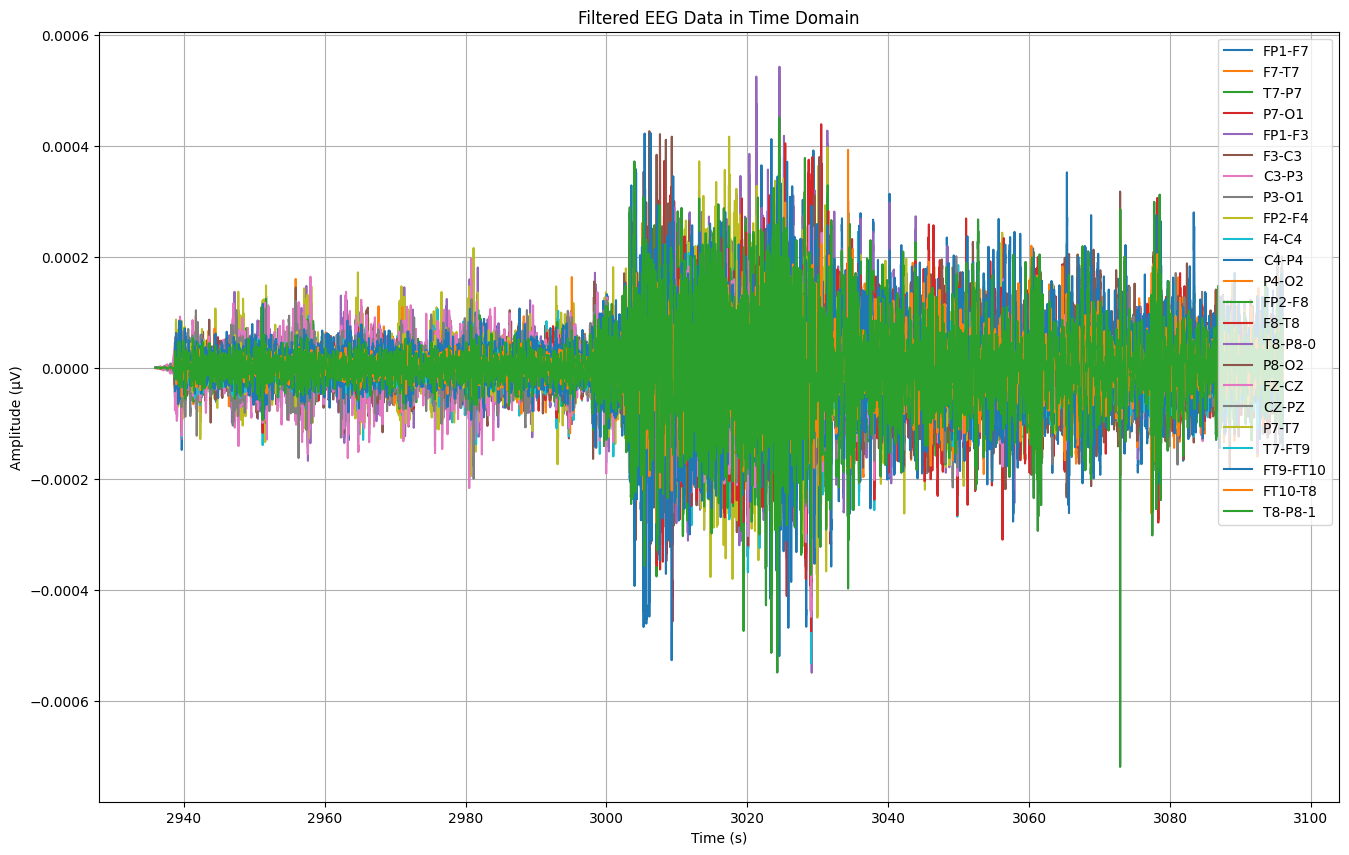

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    # Ganti window ke 'boxcar' untuk rectangular window
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='boxcar')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 50
sampling_rate = 256
num_taps = 1409

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
